# Importing the Required Libraries

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import pickle
import os

print("Python version:", sys.version)
print(os.getcwd())

Python version: 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
d:\Projects\Mini_Projects\Mental_Health_Survey\Scripts


In [ ]:
# ! pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
file_path = r"D:\Projects\Mini_Projects\Mental_Health_Survey\Research_Data\cleaned_data.csv" # update this path

In [ ]:
data = pd.read_csv(file_path) #

In [7]:
data.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49,Ludhiana,Working Professional,Chef,0,5,0.00,0,2,6-8 hours,Healthy,BHM,No,1,2,No,0
1,Male,26,Varanasi,Working Professional,Teacher,0,4,0.00,0,3,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1
2,Male,33,Visakhapatnam,Student,Not Yet Disclosed,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
3,Male,22,Mumbai,Working Professional,Teacher,0,5,0.00,0,1,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1
4,Female,30,Kanpur,Working Professional,Business Analyst,0,1,0.00,0,1,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0


In [ ]:
data.shape  # Identify the number of rows and columns in the dataset

(135769, 18)

In [ ]:
data.info() # Identify the data types of each column and check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135769 entries, 0 to 135768
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 135769 non-null  object 
 1   Age                                    135769 non-null  int64  
 2   City                                   135769 non-null  object 
 3   Working Professional or Student        135769 non-null  object 
 4   Profession                             135769 non-null  object 
 5   Academic Pressure                      135769 non-null  int64  
 6   Work Pressure                          135769 non-null  int64  
 7   CGPA                                   135769 non-null  float64
 8   Study Satisfaction                     135769 non-null  int64  
 9   Job Satisfaction                       135769 non-null  int64  
 10  Sleep Duration                         135769 non-null  

# Features Selection

In [10]:
numerical_features = data.select_dtypes(include = ['int64','float64'])
categorical_features = data.select_dtypes(include = 'object')

# 

======================================= Age =======================================


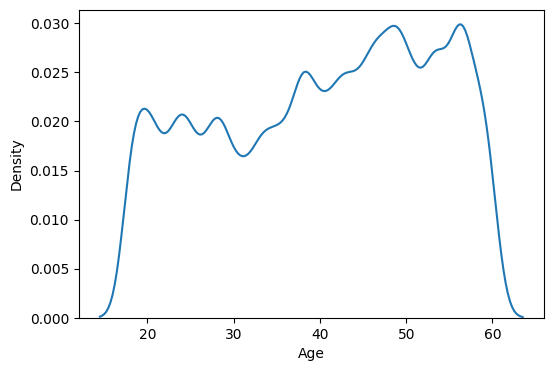

======================================= Academic Pressure =======================================


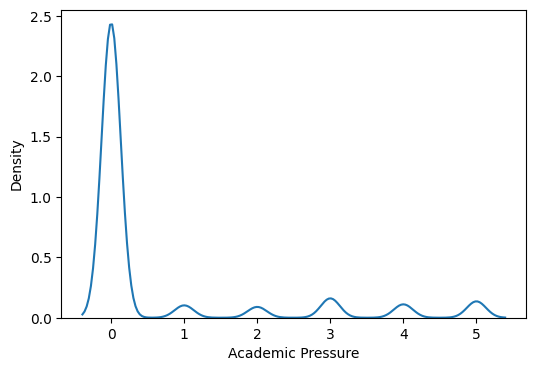

======================================= Work Pressure =======================================


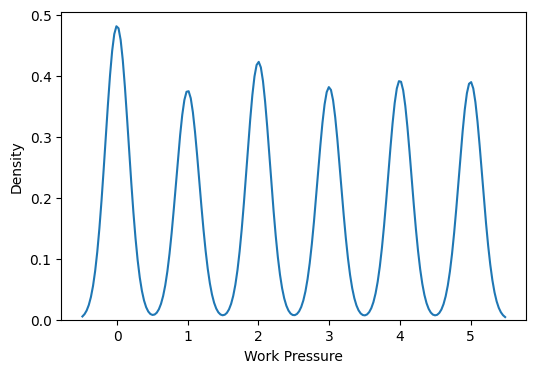

======================================= CGPA =======================================


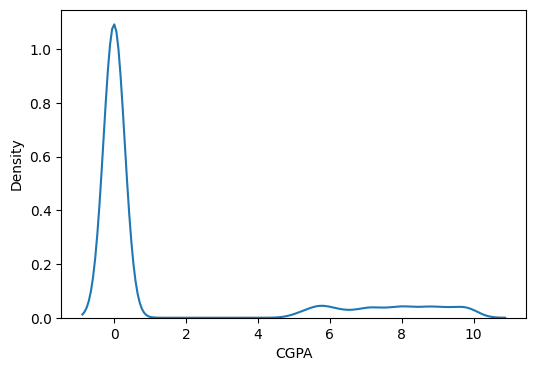

======================================= Study Satisfaction =======================================


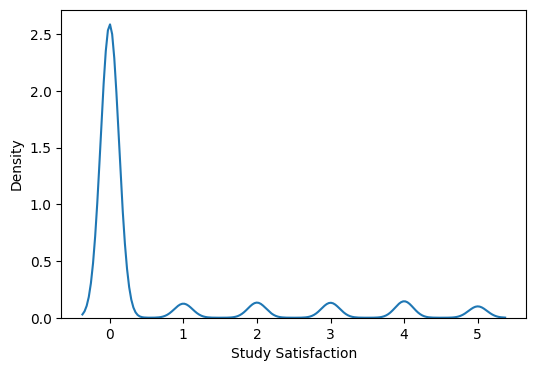

======================================= Job Satisfaction =======================================


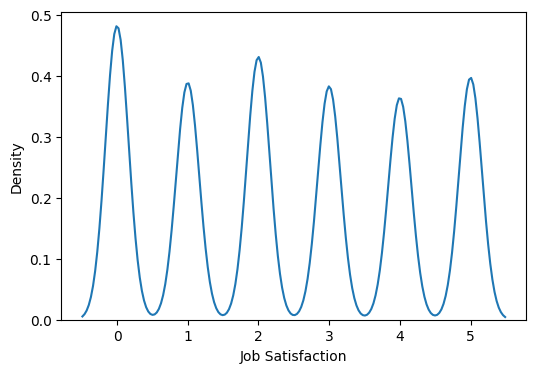

======================================= Work/Study Hours =======================================


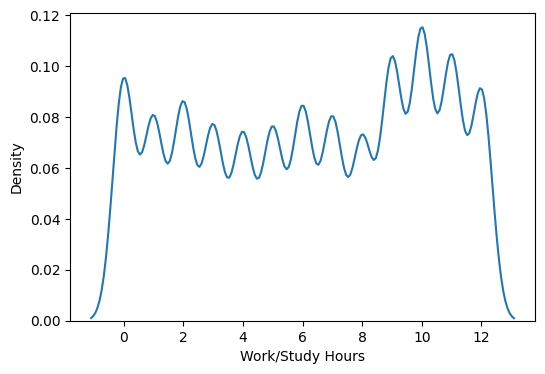

======================================= Financial Stress =======================================


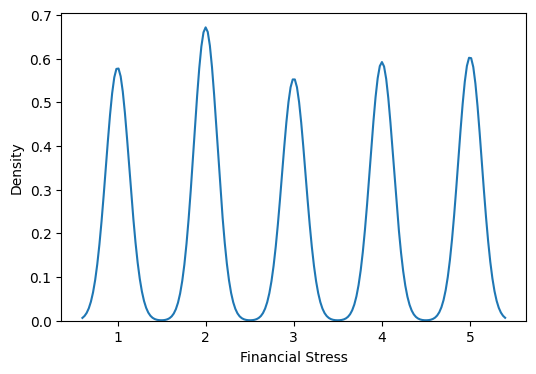

======================================= Depression =======================================


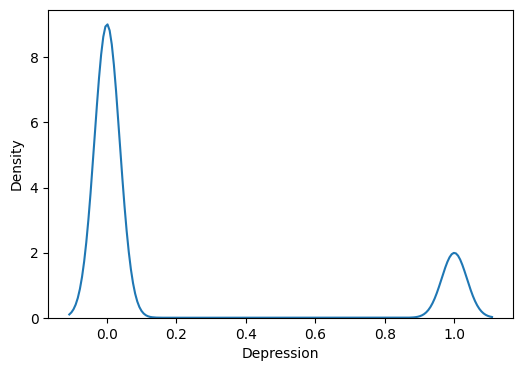

In [11]:
for i in numerical_features:
    plt.figure(figsize = (6,4))
    sns.kdeplot(data[i])
    print('======================================= ' + i + ' =======================================')
    plt.show()

In [ ]:
# Correlation matrix

corr = numerical_features.corr()

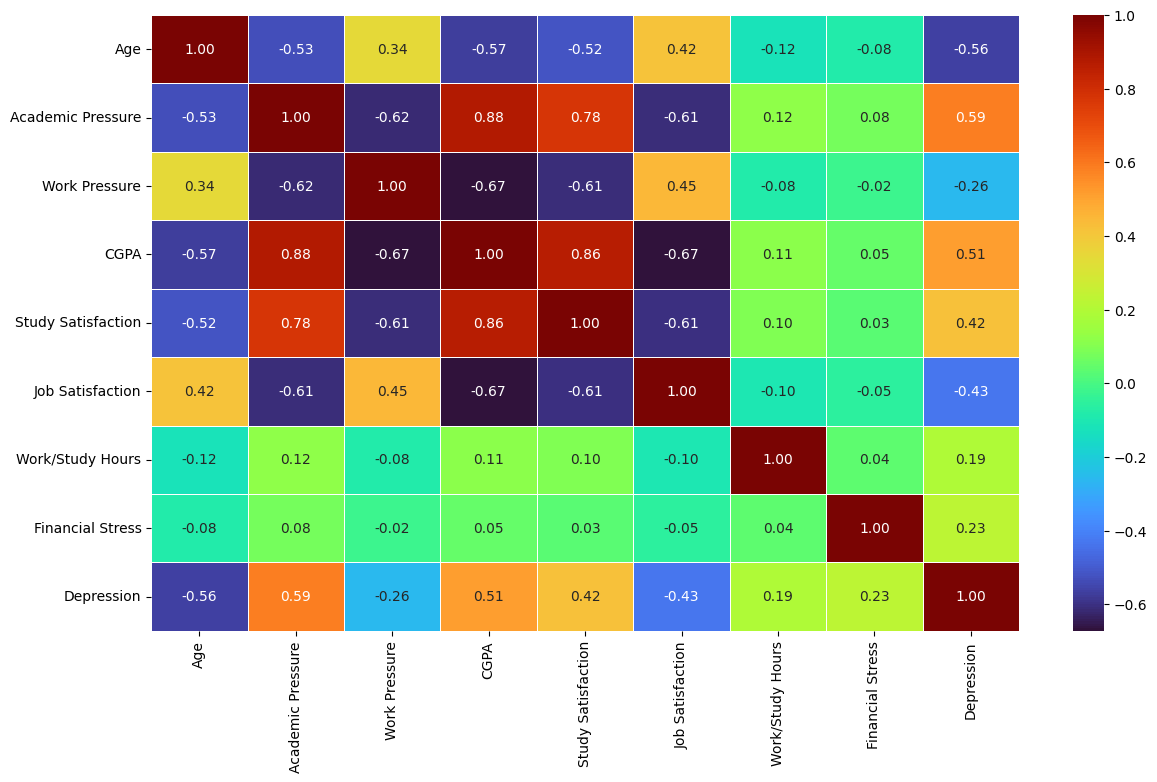

In [45]:
plt.figure(figsize = (14,8))

sns.heatmap(corr, cmap = 'turbo', annot = True, fmt = '.2f', linewidths = 0.5)

plt.show()

In [14]:
# Numerical Feature Selection

corr[abs(corr) > 0.6]

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic Pressure,NaN,1.000000,-0.617388,0.876001,0.776152,-0.612365,NaN,NaN,NaN
Work Pressure,NaN,-0.617388,1.000000,-0.672227,-0.610918,NaN,NaN,NaN,NaN
CGPA,NaN,0.876001,-0.672227,1.000000,0.864792,-0.666749,NaN,NaN,NaN
Study Satisfaction,NaN,0.776152,-0.610918,0.864792,1.000000,-0.605938,NaN,NaN,NaN
Job Satisfaction,NaN,-0.612365,NaN,-0.666749,-0.605938,1.000000,NaN,NaN,NaN
Work/Study Hours,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Financial Stress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Depression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool)).stack().reset_index()  # Get the correlation values of the upper triangle of the correlation matrix

,level_0,level_1,0
0,Age,Academic Pressure,-0.530250
1,Age,Work Pressure,0.344741
2,Age,CGPA,-0.570884
3,Age,Study Satisfaction,-0.518355
4,Age,Job Satisfaction,0.415608
5,Age,Work/Study Hours,-0.118010
6,Age,Financial Stress,-0.083578
7,Age,Depression,-0.564844
8,Academic Pressure,Work Pressure,-0.617388
9,Academic Pressure,CGPA,0.876001


In [ ]:
pair_corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool)).stack().reset_index() 

In [ ]:
pair_corr[abs(pair_corr[0]) > 0.6] # Identify the pairs of features with correlation greater than 0.6

,level_0,level_1,0
8,Academic Pressure,Work Pressure,-0.617388
9,Academic Pressure,CGPA,0.876001
10,Academic Pressure,Study Satisfaction,0.776152
11,Academic Pressure,Job Satisfaction,-0.612365
15,Work Pressure,CGPA,-0.672227
16,Work Pressure,Study Satisfaction,-0.610918
21,CGPA,Study Satisfaction,0.864792
22,CGPA,Job Satisfaction,-0.666749
26,Study Satisfaction,Job Satisfaction,-0.605938


In [ ]:
corr_60 = pair_corr[abs(pair_corr[0]) > 0.6] # Get the pairs of features with correlation greater than 0.6

In [19]:
corr_60.columns = ['Primary','Secondary','Score']

In [20]:
corr_60.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False)

,Secondary
Primary,
Academic Pressure,4
CGPA,2
Work Pressure,2
Study Satisfaction,1


In [21]:
corr_60.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False).index

Index(['Academic Pressure', 'CGPA', 'Work Pressure', 'Study Satisfaction'], dtype='object', name='Primary')

In [22]:
col_to_drop = ['Academic Pressure', 'CGPA', 'Work Pressure', 'Study Satisfaction']

In [23]:
data.drop(col_to_drop, axis = 1, inplace = True)

In [24]:
# Categorical Feature Selection

col = []
counts = []

for i in data.select_dtypes(include = 'object').columns:
  col.append(i)
  counts.append(data[i].nunique())
  

In [ ]:
pd.DataFrame({
    "col": col,
    "counts": counts
}).sort_values('counts', ascending = False) # Identify the number of unique values in each categorical column

,col,counts
3,Profession,39
1,City,29
6,Degree,28
4,Sleep Duration,4
5,Dietary Habits,3
0,Gender,2
2,Working Professional or Student,2
7,Have you ever had suicidal thoughts ?,2
8,Family History of Mental Illness,2


# Exploratory Data Analysis

In [ ]:
# Label Encoding
# Label Encoding is used to convert categorical variables into numerical values.
encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

In [ ]:
corr_1 = data.corr()  # Identify the correlation matrix after label encoding

In [28]:
corr_1

,Gender,Age,City,Working Professional or Student,Profession,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,-0.007671,-0.016664,-0.006277,0.013445,-0.009324,0.001928,0.039256,0.008377,-0.010266,0.006896,-0.006409,-0.015406,0.008394
Age,-0.007671,1.000000,0.031207,0.583934,-0.176801,0.415608,-0.052529,-0.071696,0.058084,-0.141015,-0.118010,-0.083578,0.009573,-0.564844
City,-0.016664,0.031207,1.000000,0.016876,-0.006316,0.015412,0.008520,0.004850,-0.011990,0.006614,-0.001199,-0.007772,0.008545,-0.023562
Working Professional or Student,-0.006277,0.583934,0.016876,1.000000,-0.221788,0.681670,-0.020130,-0.052858,0.015544,-0.137022,-0.116026,-0.052158,0.012319,-0.520734
Profession,0.013445,-0.176801,-0.006316,-0.221788,1.000000,-0.159735,0.005163,0.032788,0.000365,0.037208,0.033394,0.020501,-0.004264,0.144660
Job Satisfaction,-0.009324,0.415608,0.015412,0.681670,-0.159735,1.000000,-0.018415,-0.054052,0.019453,-0.129753,-0.098145,-0.054677,-0.000781,-0.433394
Sleep Duration,0.001928,-0.052529,0.008520,-0.020130,0.005163,-0.018415,1.000000,0.012859,0.000664,0.025052,0.003359,0.003855,0.002920,0.066894
Dietary Habits,0.039256,-0.071696,0.004850,-0.052858,0.032788,-0.054052,0.012859,1.000000,-0.014031,0.066321,0.028580,0.043498,0.002273,0.149523
Degree,0.008377,0.058084,-0.011990,0.015544,0.000365,0.019453,0.000664,-0.014031,1.000000,-0.000082,-0.003267,-0.001080,0.008131,-0.028861
Have you ever had suicidal thoughts ?,-0.010266,-0.141015,0.006614,-0.137022,0.037208,-0.129753,0.025052,0.066321,-0.000082,1.000000,0.064172,0.086698,0.009106,0.348279


In [ ]:
pair_corr_1 = corr_1.where(np.triu(np.ones(corr_1.shape), k = 1).astype(bool)).stack().reset_index() # Get the correlation values of the upper triangle of the correlation matrix after label encoding

In [ ]:
corr_60_1 = pair_corr_1[abs(pair_corr_1[0]) > 0.6] # Get the pairs of features with correlation greater than 0.6 after label encoding

In [31]:
corr_60_1.columns = ['Primary','Secondary','Score']

In [32]:
corr_60_1.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False)

,Secondary
Primary,
Working Professional or Student,1


In [33]:
corr_60_1.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False).index

Index(['Working Professional or Student'], dtype='object', name='Primary')

In [34]:
col_to_drop_1 = 'Working Professional or Student'

In [35]:
data.drop(col_to_drop_1, axis = 1, inplace = True)

==================  Gender  ==================


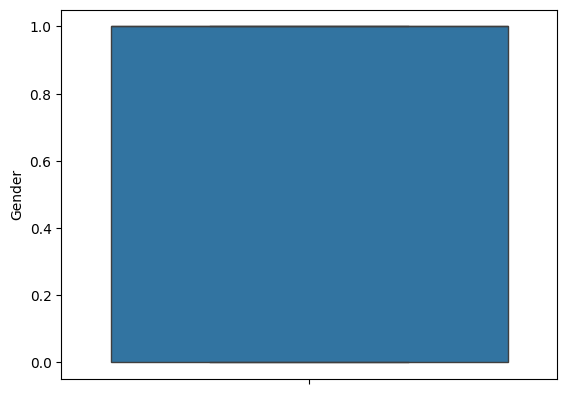

==================  Age  ==================


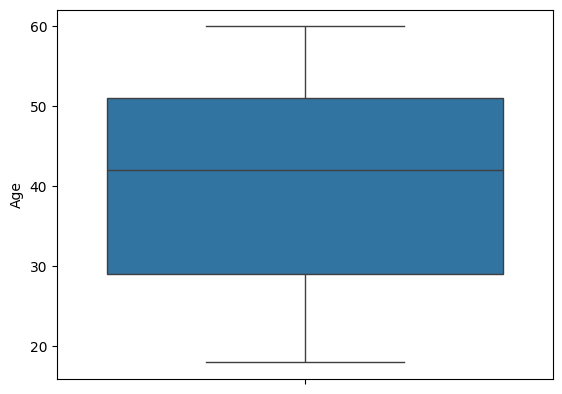

==================  City  ==================


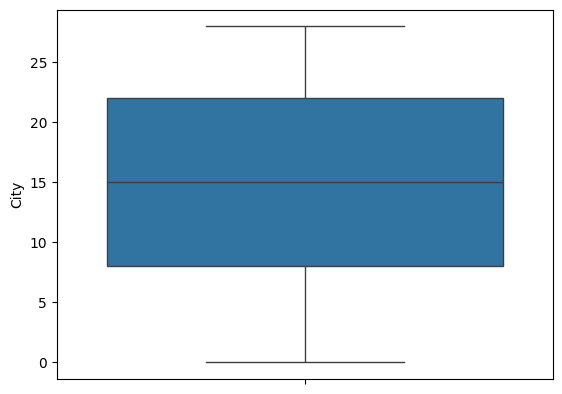

==================  Profession  ==================


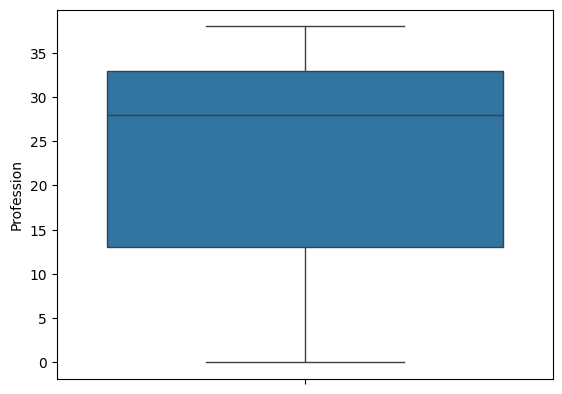

==================  Job Satisfaction  ==================


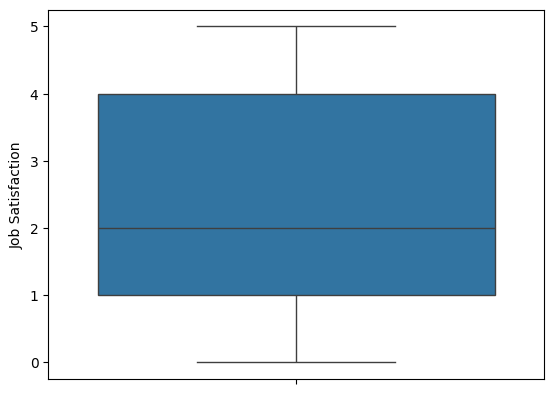

==================  Sleep Duration  ==================


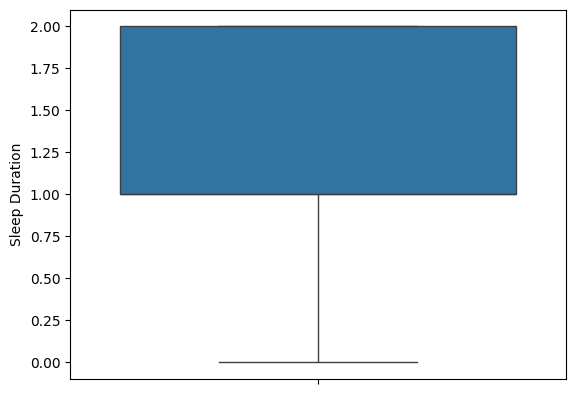

==================  Dietary Habits  ==================


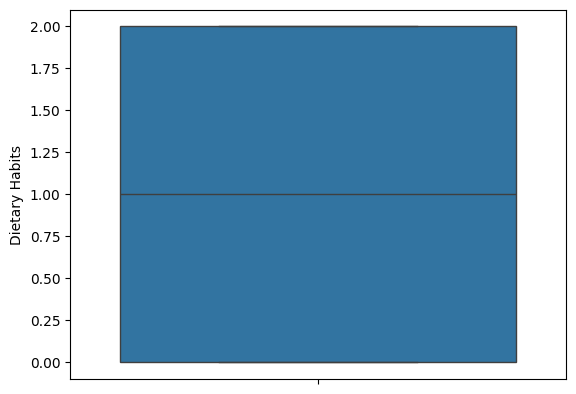

==================  Degree  ==================


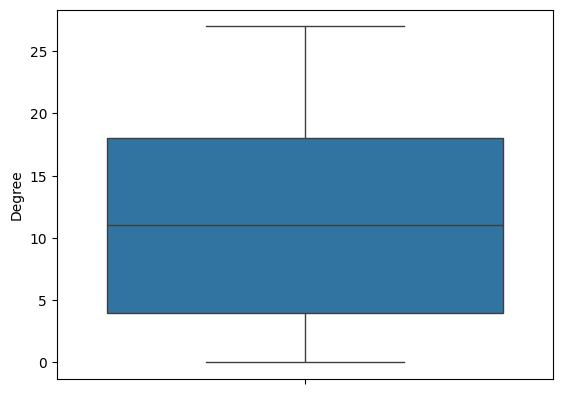

==================  Have you ever had suicidal thoughts ?  ==================


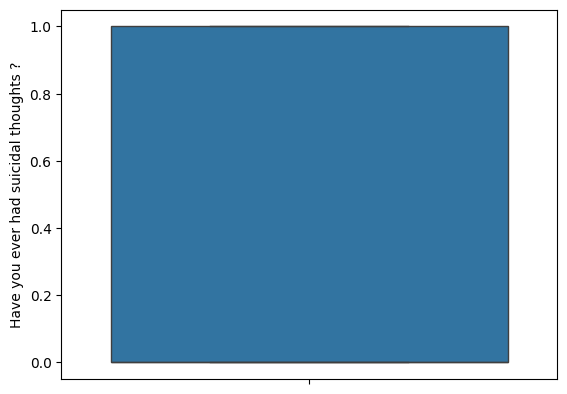

==================  Work/Study Hours  ==================


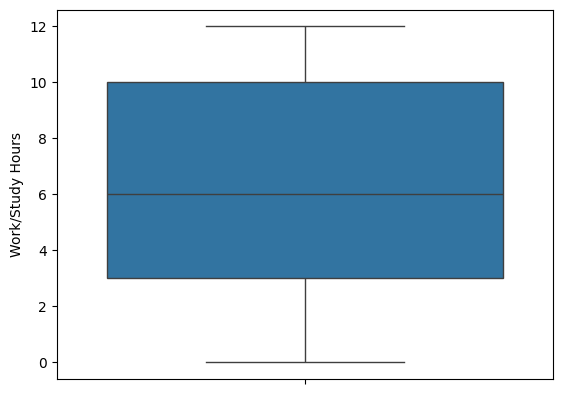

==================  Financial Stress  ==================


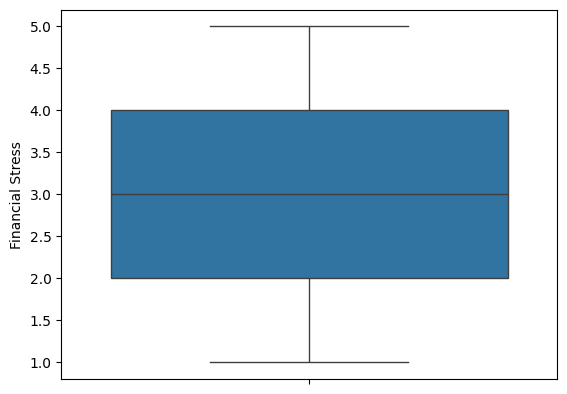

==================  Family History of Mental Illness  ==================


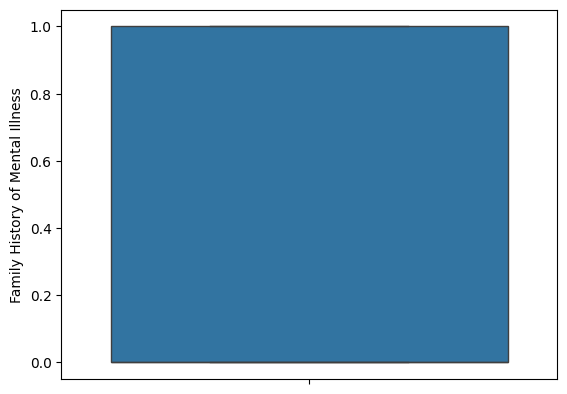

==================  Depression  ==================


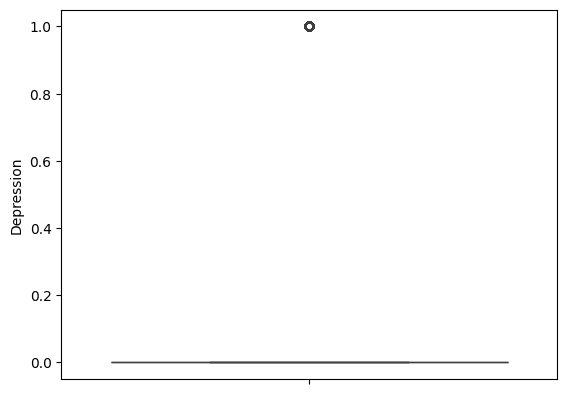

In [36]:
# Checking For Outliers

for i in data.columns:

  print("================== ", i," ==================")
  sns.boxplot(data[i].head(10000))
  plt.show()

In [37]:
# Data after Preprocessing

corr_1 = data.corr()

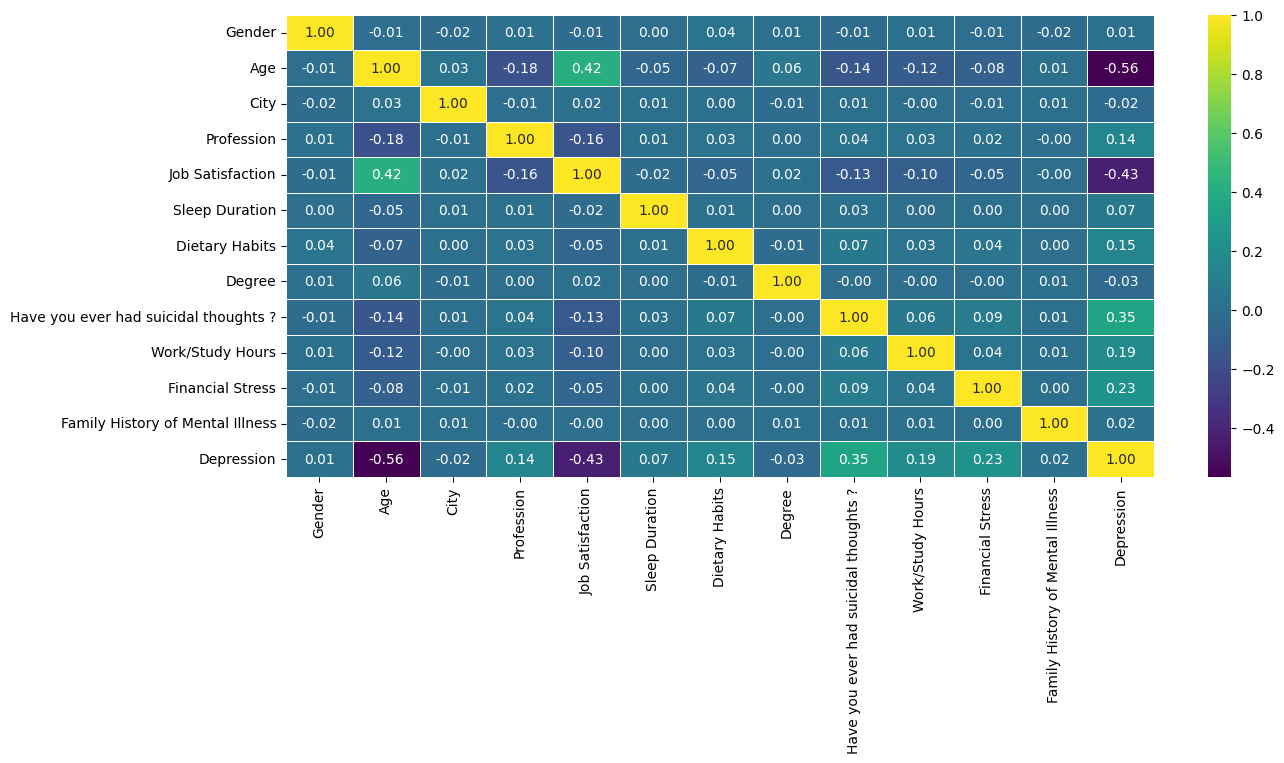

In [38]:
plt.figure(figsize = (14,6))

sns.heatmap(corr_1, cmap = 'viridis', annot = True, fmt = '.2f', linewidths = 0.5)

plt.show()

In [39]:
data.head()

,Gender,Age,City,Profession,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49,15,4,2,1,0,9,0,1,2,0,0
1,1,26,26,36,3,2,2,12,1,7,3,0,1
2,1,33,28,28,0,0,0,3,1,3,1,0,1
3,1,22,17,36,1,2,1,6,1,10,1,1,1
4,0,30,12,3,1,0,2,6,1,9,4,1,0


In [ ]:
# Pickle the Preprocessor

# Save the encoders to a pickle file for later use
# This is useful for transforming new data in the same way as the training data

preprocess_objects = {'encoders': encoders}

with open('D:\\Projects\\Mini_Projects\\Mental_Health_Survey\\Model\\preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocess_objects, f)

In [ ]:
 # Save the preprocessed data to a CSV file

data.to_csv('D:\\Projects\\Mini_Projects\\Mental_Health_Survey\\Research_Data\\preprocessed_data.csv')